In [1]:
import pandas as pd
from pandas import DataFrame, Series
import re
import csv
import sys
import numpy as np
from sklearn.decomposition import PCA
from datetime import datetime, date, time
import string
from sklearn.naive_bayes import MultinomialNB
from sklearn.cross_validation import cross_val_score
from sklearn.feature_extraction.text import TfidfTransformer
from nltk import word_tokenize          
from nltk import PorterStemmer
from nltk import corpus
from sklearn.feature_extraction.text import TfidfVectorizer
stopwords = corpus.stopwords.words('english') 
from nltk import Text
from IPython.display import Image
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
import nltk
from scipy.sparse import csc_matrix
from sklearn.decomposition import pca 
from sklearn.naive_bayes import GaussianNB

## Read the Data

## Transform the Data

In [2]:
### delete the string part of size
def only_number(x):
    return x[:-3]

### get the average number installation
def avg_install(x):
    x = str(x)
    a = int(x.split('-')[0].replace(',','').rstrip())
    b = int(x.split('-')[1].replace(',','').rstrip())
    return a+b

## remove comma in numbers
def Remove_comma(x):
    x = str(x)
    x = x.strip()
    x =re.sub(',','',x)
    return x

In [3]:
### reading files
list = ['3.1','3.2','3.3','3.4','3.5','3.7',
        '3.12','3.15','3.16','3.19','3.20','3.20','4.2',
       '4.4','4.11','4.12','4.13','4.14','4.15','4.17','4.20','4.21']
df = DataFrame()
list_pd = []
for i in range(0,len(list)):
    filenamei = list[i]+'.csv'
    filei = pd.read_csv(filenamei)
    filei = filei.drop('url',1) 
    ## drop the information 'url'
    list_df = list_pd.append(filei)   ### read into dataframe

    
### combine all the dataframes
df = pd.concat(list_pd,ignore_index = True)


### edit values in column "top developer" "size" "review_num" 
df['topDeveloper'] = df['topDeveloper'].replace({"Top Developer":1,np.nan:0})  

df['size'] = df['size'].map(lambda x: only_number(str(x)))
df['size'] = df['size'].replace({'':np.nan})
df['reviews_num'] = df['reviews_num'].map(lambda x: int(Remove_comma(x)))

### add a column about days after published
df['DatePublished'] = df['DatePublished'].map(lambda x: datetime.strptime(x,"%d-%b-%y"))
df['DaysPublish'] = df['DatePublished'].map(lambda x: (datetime.today()-x).days)

## convert number of stars,Num-install into int 

df["Num_star"] = df["Num_star"].map(lambda x: float(x))

##remove comma in columns of NumInstall
df['NumInstall'] = df['NumInstall'].map(lambda x:Remove_comma(x))

### remove'and up' in the columns of operating_systems.only numbers allowed
list_os = []
import string
for i in df['operatingSys'].tolist():
    i = string.replace(i,'and up','')
    i = i.strip()
    list_os.append(i)
df['operatingSys'] = list_os


## convert data type of the column 'what_is_new','description'
df['what_is_new'] = df['what_is_new'].astype('string')
df['description'] = df.description.astype('string')

In [4]:
df = df.drop_duplicates()
df_column_names = ['operatingSys',
                  'subcategory',
                   'description',
                  'what_is_new',
                   'NumInstall',
                   'DatePublished',
                   'softwareVersion',
                   'size',
                   'topDeveloper',
                   'reviews_num',
                   'Num_star',
                   'app_name',
                   'DaysPublish']
unique_values = []
for i in df_column_names:
    df_uniquei = set((df[i]))
    null_num_i = df[i].isnull().sum()
    unique_values.append(len(df_uniquei))
    print "%s:\n%d unique values, %d missing values" % (i,len(df_uniquei),null_num_i)

operatingSys:
19 unique values, 0 missing values
subcategory:
23 unique values, 0 missing values
description:
2814 unique values, 0 missing values
what_is_new:
224 unique values, 0 missing values
NumInstall:
16 unique values, 0 missing values
DatePublished:
91 unique values, 0 missing values
softwareVersion:
425 unique values, 576 missing values
size:
258 unique values, 599 missing values
topDeveloper:
2 unique values, 0 missing values
reviews_num:
2734 unique values, 0 missing values
Num_star:
33 unique values, 0 missing values
app_name:
2227 unique values, 0 missing values
DaysPublish:
91 unique values, 0 missing values


In [12]:
pd.DataFrame({'name':df_column_names,
                          'unique values': unique_values}).to_csv('dataoverview.csv')

## How many apps we have?

In [5]:
len(df['app_name'].unique())

2227

In [6]:
df = df.reset_index(range(len(df)))
df.head()

,index,operatingSys,subcategory,description,what_is_new,NumInstall,DatePublished,softwareVersion,size,topDeveloper,reviews_num,Num_star,app_name,DaysPublish
0,0,3.0,Arcade,Stack up the blocks as high as you can!,nan,500000 - 1000000,2016-02-17,1,25,1,23053,4.4,Stack,63
1,1,4.0,Role Playing,Juggernaut Wars is a new captivating Action RP...,"- Much requested Exit window added,- Fixed a b...",10000 - 50000,2016-02-26,NaN,NaN,1,3364,4.5,Juggernaut Wars,54
2,2,2.3,Casino,Mountains of Sichuan is a place where all thin...,nan,100 - 500,2016-02-23,NaN,NaN,0,54,4.3,Panda Adventure Slot Machines,57
3,3,2.3,Action,The beasts are back in Mutant Fighting Cup 2! ...,- Fixed an issue with the Multiplayer PvP syst...,100000 - 500000,2016-02-23,1.0.8,44,1,8016,4.5,Mutant Fighting Cup 2,57
4,4,2.3,Adventure,Apple Shooter Champ is an exciting Shooting Ga...,nan,50000 - 100000,2016-02-05,1,12,0,591,2.7,Apple Shooter Champ,75


### Text Feature extraction in sklean
sklearn.feature_extraction.text

CountVectorizer: transform articles into token_count matrix

TfidfVectorizer: transform articles into token_TFIDF matrix

--fit: construct token dictionary given dataset

--transform: generate numerical matrix

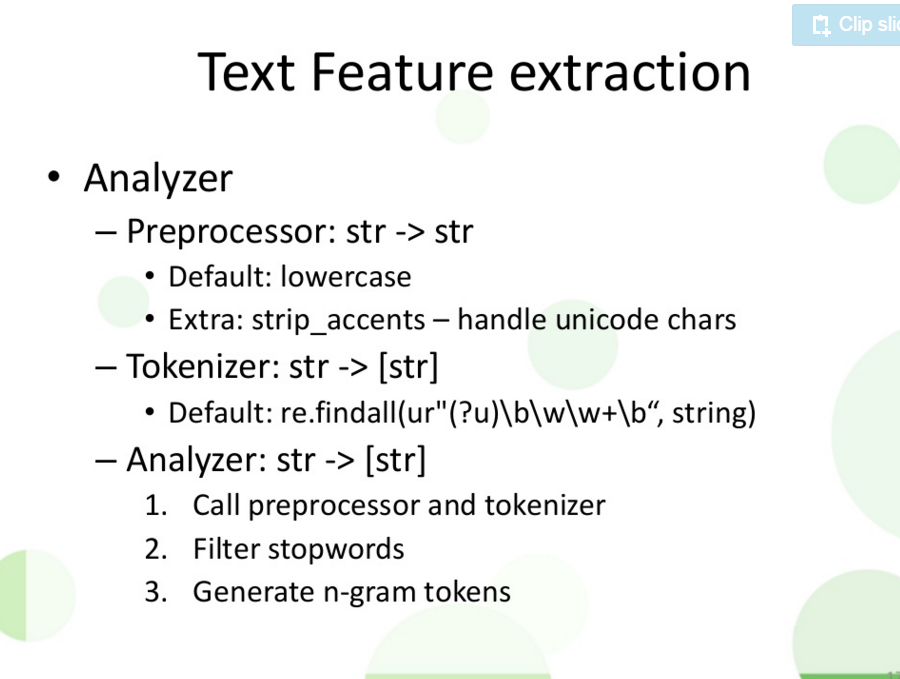

In [54]:
Image(filename = 'Text Feature Extraction.png')

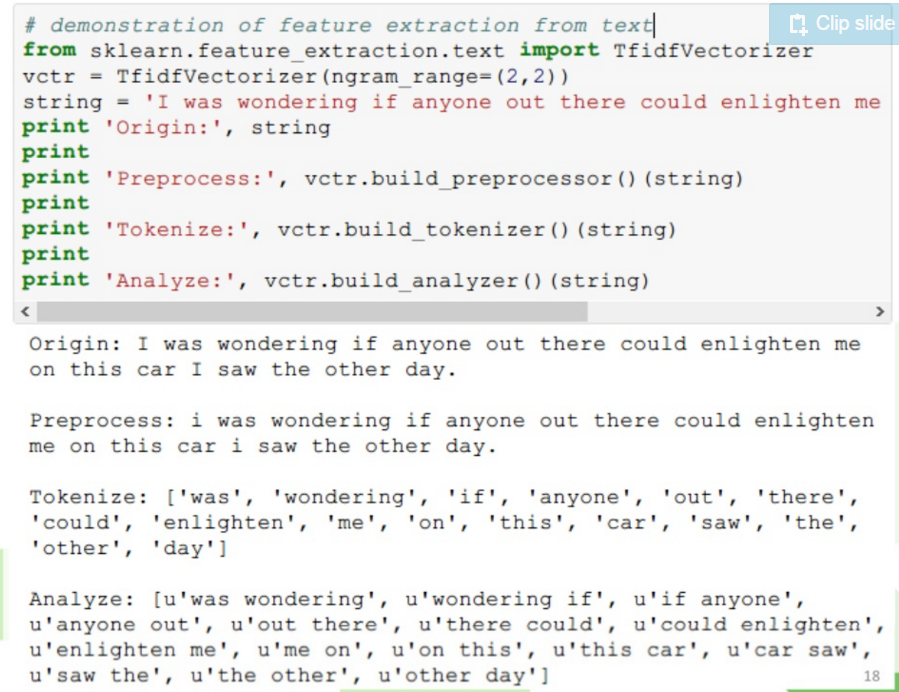

In [55]:
Image(filename = 'tfidfVectorizer.png')

## Text Cleaning Functions

In [6]:
%timeit
def remove_numbers(s):
    return s.translate(None, string.digits)

def lowercase_remove_punctuation(s):
    s = s.lower()
    s = s.translate(None, string.punctuation)
    return s
    
def remove_stopwords(s):
    token_list = word_tokenize(s)
    exclude_stopwords = lambda token : token not in stopwords
    return ' '.join(filter(exclude_stopwords, token_list))

def stem_token_list(token_list):
    STEMMER = PorterStemmer()
    return [STEMMER.stem(tok.decode('ascii',errors = 'ignore')) for tok in token_list]

from nltk import pos_tag
def tag(token_list):
    POS = pos_tag(token_list)
    return [word for (word, tag) in POS if tag.startswith('N')]

def restring_tokens(token_list):
    return ' '.join(token_list)

def all_work(s):
    s = remove_numbers(s)
    s = lowercase_remove_punctuation(s)
    s = remove_stopwords(s)
    token_list = word_tokenize(s)
    #token_list = tag(token_list)
    token_list = stem_token_list(token_list)
    return restring_tokens(token_list)

def all_work_for_whatisnew(s):
    s = remove_numbers(s)
    s = lowercase_remove_punctuation(s)
    s = remove_stopwords(s)
    token_list = word_tokenize(s)
    token_list = tag(token_list)
    token_list = stem_token_list(token_list)
    return restring_tokens(token_list)

# Descriptive Analysis

In [7]:
df_groupByName = df.groupby([df['DaysPublish'],df['app_name']])
df_groupByCategory = df.groupby(df['subcategory'])
df_groupByDeveloper = df.groupby(df.topDeveloper)
df_starNum_category = pd.DataFrame(df_groupByCategory['Num_star'].mean()).rename(columns = {'Num_star':'Num_star_mean'}).sort_values('Num_star_mean',ascending = False)
df_starNum_category.head()

,Num_star_mean
subcategory,
Music & Video,4.716667
Word,4.411047
Board,4.392135
Casino,4.358665
Puzzle,4.278625


In [7]:
dictN_reviewNum = df_groupByName['reviews_num'].mean().to_dict()
dictN_Numstar = df_groupByName['Num_star'].mean().to_dict()
dictC_Numstar = df_groupByCategory['Num_star'].mean().to_dict()
dictD_Numstar = df_groupByDeveloper['Num_star'].mean().to_dict()
dictD_Numstar

{0: 4.0435278774046326, 1: 4.1311137301119674}

In [8]:
dictN_sorted_reviewN = sorted(dictN_reviewNum.items(), key  = lambda x: x[1], reverse = True)
dictN_sorted_Numstar = sorted(dictN_Numstar.items(), key = lambda x: x[1], reverse = True)
dictC_sorted_Numstar = sorted(dictC_Numstar.items(), key= lambda x: x[1],reverse = True)

In [11]:
dictN_sorted_Numstar[:15]

[((49L, 'Cute Baby Animals Pics Quiz'), 5.0),
 ((12L, 'Wacky Birds Bubble Shooter'), 5.0),
 ((37L, 'Jigsaw Trivia'), 5.0),
 ((36L, 'Lucky 8Ball Slots'), 5.0),
 ((18L, 'Dragon Slayer'), 5.0),
 ((45L, '\xe2\x9c\xaa Ding Dong Tiles \xe2\x9c\xaa'), 5.0),
 ((50L, 'Zombie Swipe - Cowardly Hero'), 5.0),
 ((46L, 'Super Sudoku - Brain Training'), 5.0),
 ((44L, 'Emoji Hop\xf0\x9f\x93\xa1\xe2\x9d\xa3'), 5.0),
 ((30L, 'Stargazer'), 5.0),
 ((25L, 'Candy Blast 2016'), 5.0),
 ((7L, 'Run Panda'), 5.0),
 ((32L, 'Jigsaw Trivia'), 5.0),
 ((22L, 'Wacky Birds Bubble Shooter'), 5.0),
 ((8L, 'Wacky Birds Bubble Shooter'), 5.0)]

In [13]:
dictN_sorted_reviewN[:15]

[((50L, 'Clash Royale'), 1482455.7),
 ((9L, 'Lords Mobile'), 267452.85714285716),
 ((14L, 'Lords Mobile'), 234990.0),
 ((14L, 'Dream League Soccer 2016'), 223349.875),
 ((360L, 'Battlelog'), 217772.57142857142),
 ((8L, 'Basketball Stars'), 173300.33333333334),
 ((22L, 'slither.io'), 159105.29999999999),
 ((26L, 'Lords Mobile'), 158352.0),
 ((6L, 'Driving School 2016'), 151902.75),
 ((36L, 'KENDALL & KYLIE'), 142397.0),
 ((38L, 'KENDALL & KYLIE'), 141990.0),
 ((17L, 'Disney Crossy Road'), 138649.5),
 ((62L, 'KENDALL & KYLIE'), 129580.71428571429),
 ((0L, 'EvilBane: Rise of Ravens'), 129288.0),
 ((13L, 'Driving School 2016'), 126386.5)]

In [14]:
df.groupby('operatingSys')['reviews_num'].mean()

operatingSys
1.5                      12.200000
1.6                     150.639344
2.0                     503.000000
2.0.1                 25875.500000
2.1                    4148.082474
2.2                    2228.167513
2.3                    1601.331461
2.3.3                   841.485035
3.0                    3888.194192
3.1                    1148.666667
3.2                     429.776119
4.0                    2953.830213
4.0.3                 15611.490648
4.1                    3280.654040
4.2                   10114.482759
4.3                    5930.375000
4.4                     340.973684
5.0                      48.333333
Varies with device    17322.593220
Name: reviews_num, dtype: float64

# Apps that are successful

In [61]:
df.to_csv("WholeDataset.csv")

In [64]:
df.app_name

0                                 Stack
1                       Juggernaut Wars
2         Panda Adventure Slot Machines
3                 Mutant Fighting Cup 2
4                   Apple Shooter Champ
5          Safari Archer: Animal Hunter
6        Boku to Wanko:Doggie Collector
7         Solitaire Dream Forest: Cards
8                           Speedometer
9                Color Switch Challenge
10                        Medal Masters
11                        iSlash Heroes
12                    Valentine Connect
13                     Hot Star Cricket
14                        Zombie INTERN
15             DressUp Salon and MakeUp
16            Secrets: Eclipse Mountain
17                            Solitaire
18                          Learn 2 Fly
19                      Crossword Champ
20                Cube Escape: Birthday
21                        Droppy Balls!
22        Death Shooting-Hunt leader HD
23                   RPG Revenant Dogma
24       UNDEAD FACTORY～ZombiePandemic～


In [61]:
df.head()

,operatingSys,subcategory,description,what_is_new,NumInstall,DatePublished,softwareVersion,size,topDeveloper,reviews_num,Num_star,app_name,DaysPublish
0,3.0,Arcade,Stack up the blocks as high as you can!,nan,500000 - 1000000,2016-02-17,1,25,1,23053,4.4,Stack,64
1,4.0,Role Playing,Juggernaut Wars is a new captivating Action RP...,"- Much requested Exit window added,- Fixed a b...",10000 - 50000,2016-02-26,NaN,NaN,1,3364,4.5,Juggernaut Wars,55
2,2.3,Casino,Mountains of Sichuan is a place where all thin...,nan,100 - 500,2016-02-23,NaN,NaN,0,54,4.3,Panda Adventure Slot Machines,58
3,2.3,Action,The beasts are back in Mutant Fighting Cup 2! ...,- Fixed an issue with the Multiplayer PvP syst...,100000 - 500000,2016-02-23,1.0.8,44,1,8016,4.5,Mutant Fighting Cup 2,58
4,2.3,Adventure,Apple Shooter Champ is an exciting Shooting Ga...,nan,50000 - 100000,2016-02-05,1,12,0,591,2.7,Apple Shooter Champ,76


In [66]:
df.loc[df['NumInstall'].isin(['50000 - 100000','100000 - 500000', '500000 - 1000000' , '1000000 - 5000000'])].loc[df['Num_star']>4.5]

,operatingSys,subcategory,description,what_is_new,NumInstall,DatePublished,softwareVersion,size,topDeveloper,reviews_num,Num_star,app_name,DaysPublish
77,2.3,Simulation,The world's worst kidnappers slash warriors wi...,nan,100000 - 500000,2016-02-24,1.11,60,0,9061,4.6,Idle Warriors,57
157,4.1,Music,"Join us on Twitch , to WIN unlocking codes and...","First off, thank you all so much for playing L...",100000 - 500000,2016-02-12,1.1.1,286,0,23352,4.6,Lost in Harmony,69
196,3.0,Sports,Bóng Đá C1 2016 – game quản lý bóng đá phong ...,nan,50000 - 100000,2016-02-17,1.2.2,33,0,6474,4.8,Bóng Đá C1 2016,64
244,4.0,Adventure,"17+ NOT SUITABLE FOR CHILDREN!,LONEWOLF is an ...","What's new in v.1.0.04:,- Now runs on devices ...",100000 - 500000,2016-02-15,1.0.04,69,1,11650,4.6,LONEWOLF (17+),66
515,2.3,Strategy,One of the most popular and highest rated web ...,"Update 1.0.7,- Can now replay any level from a...",100000 - 500000,2016-02-19,1.0.7,63,0,16253,4.6,Stick War: Legacy,62
549,4.0.3,Strategy,Enter the Arena! From the creators of Clash of...,"NEW CARDS, NEW ARENA and MULTIPLE BATTLE DECKS...",100000 - 500000,2016-03-02,1.2.3,87,1,125411,4.6,Clash Royale,50
583,2.3,Simulation,The world's worst kidnappers slash warriors wi...,nan,100000 - 500000,2016-02-24,1.11,60,0,9101,4.6,Idle Warriors,57
692,3.0,Sports,Bóng Đá C1 2016 – game quản lý bóng đá phong ...,nan,50000 - 100000,2016-02-17,1.2.2,33,0,6265,4.8,Bóng Đá C1 2016,64
819,4.1,Music,"Join us on Twitch ,http://www.twitch.tv/digixa...","First off, thank you all so much for playing L...",100000 - 500000,2016-02-12,1.1.1,286,0,23404,4.6,Lost in Harmony,69
959,4.0,Adventure,"17+ NOT SUITABLE FOR CHILDREN!,LONEWOLF is an ...","What's new in v.1.0.04:,- Now runs on devices ...",100000 - 500000,2016-02-15,1.0.04,69,1,12076,4.6,LONEWOLF (17+),66


## Prepare 'What is New" for Clustering

## To evaluate the accuracy of clustering 

In [9]:
%time
what_is_new = []
for i in tuple(set(df.what_is_new)):
    i = all_work(i)
    what_is_new.append(i)
what_is_new

Wall time: 0 ns


C:\Users\Miya\AppData\Local\Enthought\Canopy\User\lib\site-packages\ipykernel\__main__.py:12: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal


[u'add googl analyticsadd new level first world',
 u'minor tweak bug fixespleas rate game like tell friendspleas use ingam support featur report issu provid feedbackthank playingpleas rate game like tell friendspl',
 u'releas beta live close beta commun thank supportst fix mani crash freez bug fixedgam play spark attack effect halv new arena backgroundsnew extend tutori select how play earn reward learn advanc concept game',
 u'new version alway work hard make video poker delux best video poker game faster video poker play fix number bug first releasekeep send feedback keep make game better thank play',
 u'extra hour log game collect daili login bonu increas odd get pitcher train card pack fix issu player stat temporarili unavail train upgrad player',
 u'nan',
 u'puzzl load speed optim fix ui tablet',
 u'small fix improv',
 u'level bug fix',
 u' new muscl car ad keep follow new updat new car level come',
 u'ui updat',
 u'hey escalatorsthank feedback reviewsthi updat includ epic charact

In [10]:
what_is_new = tuple(set(what_is_new))
what_is_new

('',
 u'play one success la vega slot game comfort home go mobil devic impress princess win wealth glori golden knight scatter buck stack wild give quest rich reward download free collect welcom bonu get start',
 u'kitti pawp avail play android',
 u'nan',
 u' new everi tile get bjoker tileb use wise onlin leaderboard googl play game bugfixesani suggest bug report welcomepleas write bad review contact us email ijdpappsgmailcomi',
 u'                ',
 u'new version alway work hard make video poker delux best video poker game fix screen flicker happen devic fix number bug first releas super stablekeep send feedback keep make game better thank play best video poker game around',
 u'bugfix stabil improv',
 u'lot great improv updat ad brand new enemi upgrad graphic particl effect improv music audio better score feedback anim time color ad support older android versionsbug fix fix case game slow fix issu could caus camera shake effect continu heavi attack',
 u'level bug fix',
 u'remov slot 

# Prepare Features for Data Mining Clustering

 >  ## min_df= 4

In [11]:
tfidf_vectorizer = TfidfVectorizer(
    min_df= 4,  # min count for relevant vocabulary
    max_features=2000,  # maximum number of features
    strip_accents='unicode',  # replace all accented unicode char
    # by their corresponding  ASCII char
    analyzer='word',  # features made of words
    token_pattern=u'[a-z]+',  # tokenize only words of 4+ chars
    ngram_range=(1, 5),  # features made of a single tokens
    use_idf=True,  # enable inverse-document-frequency reweighting
    smooth_idf=True,  # prevents zero division for unseen words
    sublinear_tf=False)

# vectorize and re-weight
desc_vect = tfidf_vectorizer.fit_transform(what_is_new)
coo = desc_vect.tocoo(copy = False)
df_word_matrix = pd.DataFrame({'index': coo.row, 'feature': coo.col, 'data': coo.data}
                 )[['index', 'feature', 'data']].sort_values(['index', 'feature']).reset_index(drop=True)
word_matrix = df_word_matrix.pivot('index', 'feature', 'data')
word_matrix = word_matrix.fillna(0)

In [15]:
word_matrix.head()

feature,0,1,2,3,4,5,6,7,8,9,...,125,126,127,128,129,130,131,132,133,134
index,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0.000000,0,0,0.000000,0,...,0,0,0,0,0.000000,0.000000,0,0.290277,0,0.000000
2,0,0,0,0,0,0.652527,0,0,0.627365,0,...,0,0,0,0,0.000000,0.000000,0,0.000000,0,0.000000
4,0,0,0,0,0,0.000000,0,0,0.000000,0,...,0,0,0,0,0.000000,0.000000,0,0.000000,0,0.000000
6,0,0,0,0,0,0.000000,0,0,0.000000,0,...,0,0,0,0,0.129226,0.493974,0,0.000000,0,0.164658
7,0,0,0,0,0,0.000000,0,0,0.000000,0,...,0,0,0,0,0.000000,0.000000,0,0.000000,0,0.000000


In [16]:
tfidf_vectorizer.get_feature_names()[:10]

[u'achiev',
 u'ad',
 u'add',
 u'adjust',
 u'amaz',
 u'android',
 u'anim',
 u'audio',
 u'avail',
 u'balanc']

## Take a look of Features

In [17]:
d = (zip(tfidf_vectorizer.get_feature_names(), desc_vect.data))
d = sorted(d,key = lambda x:x[1],reverse = True)
d[:20]

[(u'minor bug fix', 1.0),
 (u'us', 0.92468964501509099),
 (u'player', 0.80887092392482673),
 (u'multipl', 0.77569328502893675),
 (u'spin', 0.76812347947729964),
 (u'updat new', 0.74707184593519893),
 (u'find', 0.67876051148278016),
 (u'updat', 0.66474330159165551),
 (u'bonu', 0.65252742204348113),
 (u'sound', 0.64030174158414288),
 (u'stabil', 0.63363569815498977),
 (u'mission', 0.63111007562945531),
 (u'bug', 0.62736513460690246),
 (u'first', 0.6236336038293504),
 (u'user experi', 0.60771003503531418),
 (u'increas', 0.60470548038951843),
 (u'user', 0.58710214295216057),
 (u'includ', 0.5598065947012455),
 (u'store', 0.55586785683546935),
 (u'thank', 0.51545319048405958)]

## Feature Selection using part of speech tagging

* Only 'JJ','JJS','JJR','NN','NNP','RB','VB','VBP','VBZ','RBR','VBD','VBN'

In [12]:
d = (zip(tfidf_vectorizer.get_feature_names(), desc_vect.data))
df_clustering = DataFrame(d)
df_clustering.columns = ['feature','idf']
df_clustering['Feature_NO'] = range(len(df_clustering))
map(lambda x:x[1],nltk.pos_tag(df_clustering.feature))
df_clustering['tag'] = map(lambda x:x[1],nltk.pos_tag(df_clustering.feature))
df_clustering = df_clustering.sort_values('idf',ascending = False)
df_clustering.groupby('tag').count()

,feature,idf,Feature_NO
tag,,,
CD,1,1,1
FW,1,1,1
IN,2,2,2
JJ,26,26,26
JJR,1,1,1
NN,75,75,75
NNS,3,3,3
PRP,1,1,1
RB,2,2,2


In [23]:
df_clustering.loc[df_clustering['tag'].isin(['VBP'])]

,feature,idf,Feature_NO,tag
50,find,0.678761,50,VBP
40,environ,0.493974,40,VBP
124,use,0.380722,124,VBP
72,issu,0.376592,72,VBP
22,collect,0.348295,22,VBP
103,reward,0.331995,103,VBP
77,make,0.312824,77,VBP
3,adjust,0.290277,3,VBP
26,correct,0.235945,26,VBP
56,follow,0.212640,56,VBP


In [13]:
df_clustering = df_clustering.loc[df_clustering['tag'].isin(['DT',
                            'JJ','JJS',
                            'JJR','NN','NNP',
                            'RB','VB','VBP','VBZ',
                            'RBR','VBD','VBN'])]

#df = df.loc[df['tag'].isin(['JJR','RB','NN','NNS','RBR','VBD','VBN','VBG'])]
#df = df.loc[df['tag'].isin(['NN','NNS','VB','VBD','VBG','VBN','VBP','VBZ','JJ','JJR','JJS','RB','RBR'])]
useful_feature = df_clustering.index.tolist()
word_matrix_less_features = word_matrix.ix[:,useful_feature]

In [25]:
len(word_matrix_less_features)

197

In [23]:
word_matrix_less_features.head()

feature,81,96,111,122,50,121,13,110,112,82,...,31,33,38,30,67,69,43,48,45,44
index,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0.266701,0,0.000000,0,...,0,0.312517,0,0.266701,0,0,0.000000,0.000000,0,0
2,0,0,0,0,0,0,0.000000,0,0.000000,0,...,0,0.000000,0,0.000000,0,0,0.000000,0.000000,0,0
4,0,0,0,0,0,0,0.000000,0,0.000000,0,...,0,0.000000,0,0.000000,0,0,0.348295,0.000000,0,0
6,0,0,0,0,0,0,0.000000,0,0.000000,0,...,0,0.000000,0,0.156029,0,0,0.000000,0.148979,0,0
7,0,0,0,0,0,0,0.000000,0,0.678761,0,...,0,0.000000,0,0.000000,0,0,0.000000,0.000000,0,0


## Principal Component Analysis

In [24]:
cov_mat = np.cov(word_matrix_less_features.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
plt.bar(range(1, 127), var_exp, alpha=0.5, align='center',
        label='individual explained variance')
plt.step(range(1, 127), cum_var_exp, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('./figures/pca1.png', dpi=300)
plt.show()

## 90 Principal can explain most variance

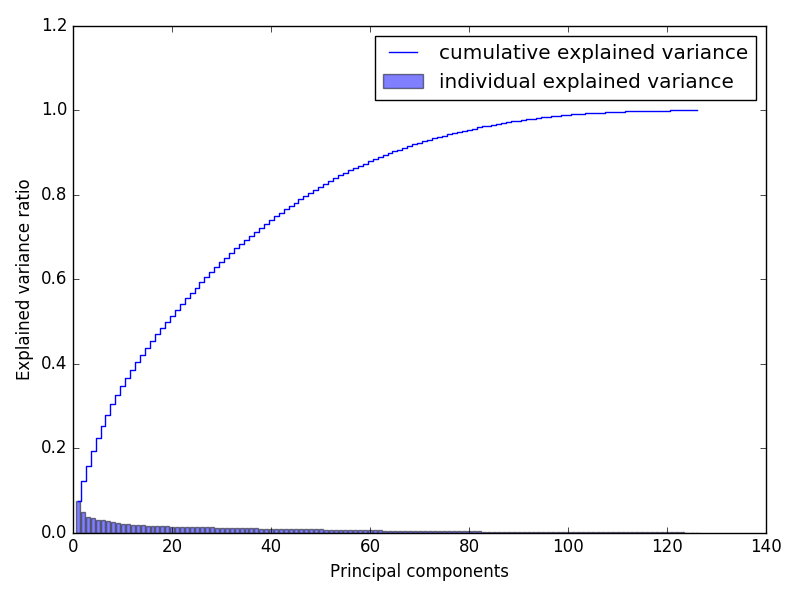

In [29]:
Image('figure_1.png')

In [14]:
sklearn_pca = PCA(n_components=90)
word_matrix_pca = sklearn_pca.fit_transform(word_matrix_less_features)

In [108]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 5)
%time
km.fit(word_matrix_pca)
clusters = km.labels_.tolist()
df_what_is_new_ngram= DataFrame({'what_is_new': word_matrix.index, 'cluster': clusters})
df_what_is_new_ngram.groupby('cluster').get_group(0)
content = []
for i in df_what_is_new_ngram.what_is_new:
    content.append(what_is_new[i])
df_what_is_new_ngram['content'] = content
df_what_is_new_ngram.groupby('cluster').count()

Wall time: 0 ns


,what_is_new,content
cluster,,
0,18,18
1,87,87
2,26,26
3,24,24
4,42,42


In [109]:
df_what_is_new_ngram.head()

,cluster,what_is_new,content
0,1,1,play one success la vega slot game comfort hom...
1,1,2,kitti pawp avail play android
2,1,4,new everi tile get bjoker tileb use wise onli...
3,1,6,new version alway work hard make video poker d...
4,1,7,bugfix stabil improv


## Word Cloud

In [110]:
Group0 = df_what_is_new_ngram.groupby('cluster').get_group(0)
Group1 = df_what_is_new_ngram.groupby('cluster').get_group(1)
Group2 = df_what_is_new_ngram.groupby('cluster').get_group(2)
Group3 = df_what_is_new_ngram.groupby('cluster').get_group(3)
Group4 = df_what_is_new_ngram.groupby('cluster').get_group(4)

In [111]:
df0 = pd.DataFrame(Group0.content).to_csv('df0.csv')
df1 = pd.DataFrame(Group1.content).to_csv('df1.csv')
df2 = pd.DataFrame(Group2.content).to_csv('df2.csv')
df3 = pd.DataFrame(Group3.content).to_csv('df3.csv')
df4 = pd.DataFrame(Group4.content).to_csv('df4.csv')

In [125]:
from wordcloud import WordCloud
text = open('df0.csv').read()

# Generate a word cloud image
wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
# take relative word frequencies into account, lower max_font_size
import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [62]:
from wordcloud import WordCloud
text = open('df4.csv').read()

# Generate a word cloud image
wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [39]:
df_what_is_new_ngram.groupby('cluster')['what_is_new']==np.nan

False

# Prepare Description Text for Classification

In [31]:
description_for_text = pd.DataFrame(df[['description','subcategory']])
description_for_text.head()

,description,subcategory
0,Stack up the blocks as high as you can!,Arcade
1,Juggernaut Wars is a new captivating Action RP...,Role Playing
2,Mountains of Sichuan is a place where all thin...,Casino
3,The beasts are back in Mutant Fighting Cup 2! ...,Action
4,Apple Shooter Champ is an exciting Shooting Ga...,Adventure


In [32]:
## drop duplicates and na
## Set app_name as the index
## make subcategory categorical feature
description_for_text = description_for_text.drop_duplicates('description').dropna()
#description_for_text.subcategory = description_for_text.subcategory.astype('category')
description_for_text = description_for_text.reset_index(range(len(description_for_text)))
for i in description_for_text.index:
    if i not in range(0,len(description_for_text)):
        print i

## Combine App Categories

description_for_text.subcategory = description_for_text.subcategory.replace(['Action','Adventure',
                                          'Arcade','Action & Adventure'],'Action & Adventure & Arcade')
description_for_text.subcategory = description_for_text.subcategory.replace(['Word','Puzzle'],'Word & Puzzle')
description_for_text.subcategory = description_for_text.subcategory.replace('Racing','Sports')
description_for_text.subcategory = description_for_text.subcategory.replace(['Pretend Play','Role Playing'],'Role Playing')
description_for_text.subcategory = description_for_text.subcategory.replace('Educational','Education')                                              

## How Many App Categories 

In [150]:
len(set(tuple(description_for_text.subcategory.tolist())))

23

## Top Ten Categories

In [33]:
Ten_cate = description_for_text.groupby('subcategory').count().sort('index',ascending = False).iloc[:10,:].index.tolist()
Ten_cate

C:\Users\Miya\AppData\Local\Enthought\Canopy\User\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


['Casual',
 'Puzzle',
 'Simulation',
 'Action',
 'Arcade',
 'Adventure',
 'Casino',
 'Racing',
 'Role Playing',
 'Sports']

In [34]:
description_for_text = description_for_text.loc[description_for_text['subcategory'].isin(Ten_cate)]

In [130]:
description_for_text.head()

,index,description,subcategory
0,0,Stack up the blocks as high as you can!,Arcade
1,1,Juggernaut Wars is a new captivating Action RP...,Role Playing
2,2,Mountains of Sichuan is a place where all thin...,Casino
3,3,The beasts are back in Mutant Fighting Cup 2! ...,Action
4,4,Apple Shooter Champ is an exciting Shooting Ga...,Adventure


## Text Preparation

In [35]:
description_for_text = description_for_text.drop_duplicates('description')
description_for_text = description_for_text.reset_index(range(len(description_for_text)))
description_for_text.head()

,level_0,index,description,subcategory
0,0,0,Stack up the blocks as high as you can!,Arcade
1,1,1,Juggernaut Wars is a new captivating Action RP...,Role Playing
2,2,2,Mountains of Sichuan is a place where all thin...,Casino
3,3,3,The beasts are back in Mutant Fighting Cup 2! ...,Action
4,4,4,Apple Shooter Champ is an exciting Shooting Ga...,Adventure


## Average word count for app description

In [36]:
word_countVectorizer = CountVectorizer(
    analyzer='word', min_df=1)
count_vect = word_countVectorizer.fit_transform(description_for_text.description)
coo = count_vect.tocoo(copy = False)
df_desc_matrix = pd.DataFrame({'index': coo.row, 'feature': coo.col, 'data': coo.data}
                 )[['index', 'feature', 'data']].sort_values(['index', 'feature']).reset_index(drop = True)
count_matrix = df_desc_matrix.pivot('index', 'feature', 'data')
count_matrix = count_matrix.fillna(0)
count_matrix = count_matrix.reset_index(range(len(count_matrix)))

In [34]:
count_matrix.head()

feature,index,0,1,2,3,4,5,6,7,8,...,17599,17600,17601,17602,17603,17604,17605,17606,17607,17608
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
m = count_matrix.values
count_matrix['word_count'] = [sum(m[i]) for i in range(len(count_matrix))]

In [36]:
count_matrix.head()

feature,index,0,1,2,3,4,5,6,7,8,...,17600,17601,17602,17603,17604,17605,17606,17607,17608,word_count
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,59
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,25
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,35
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,26


In [38]:
plot1 = plt.boxplot(count_matrix.iloc[:,-1])
plt.title('word count for description',fontsize = 20)
plt.setp(plot1['boxes'],color= 'DarkMagenta',linewidth = 5)
plt.show()

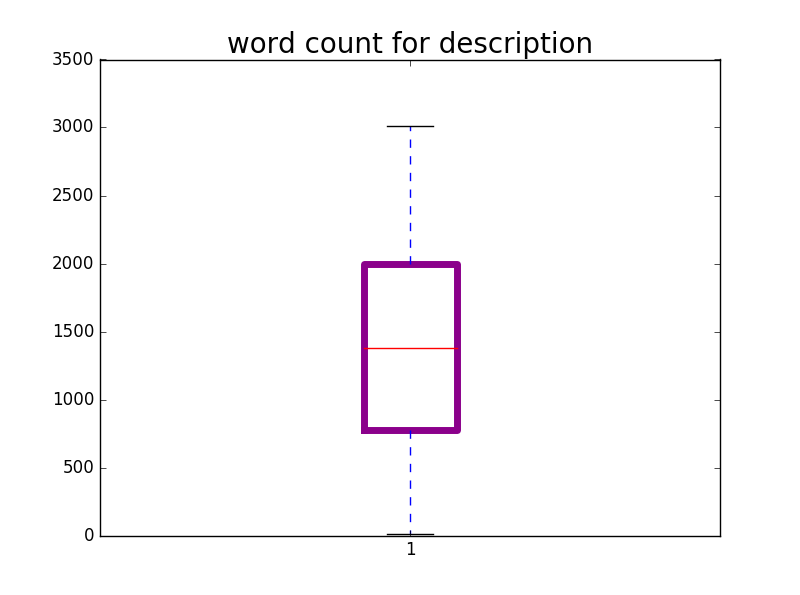

In [147]:
Image('figure_2.png')

In [39]:
count_matrix_100 = count_matrix.loc[count_matrix['word_count']>100]

In [39]:
count_matrix_100.index

Int64Index([   6,   19,   29,   31,   39,   41,   42,   43,   44,   46,
            ...
            2387, 2388, 2389, 2390, 2391, 2392, 2393, 2394, 2395, 2396],
           dtype='int64', length=2345)

## Drop Descriptions with less than 100 words

In [40]:
Null_desc = []
for i in range(0,len(description_for_text)):
    if i not in count_matrix_100.index.tolist():
        Null_desc.append(i)
description_for_text= description_for_text.drop(description_for_text.index[Null_desc])

In [41]:
description_for_text = description_for_text[['index','description','subcategory']]
description_for_text = description_for_text.reset_index(range(len(description_for_text)))

## TfiDF

In [42]:
tfidf_vectorizer = TfidfVectorizer(
    min_df= 2,  # min count for relevant vocabulary
    max_features=100000,  # maximum number of features
    strip_accents='unicode',  # replace all accented unicode char
    # by their corresponding  ASCII char
    analyzer='word',  # features made of words
    token_pattern=u'[a-z]+',  # tokenize only words of 4+ chars
    ngram_range=(1, 2),  # features made of a single tokens
    use_idf=True,  # enable inverse-document-frequency reweighting
    smooth_idf=True,  # prevents zero division for unseen words
    sublinear_tf=False)

# vectorize and re-weight
desc1_vect = tfidf_vectorizer.fit_transform(description_for_text.description)
coo = desc1_vect.tocoo(copy = False)
df_desc_matrix = pd.DataFrame({'index': coo.row, 'feature': coo.col, 'data': coo.data}
                 )[['index', 'feature', 'data']].sort_values(['index', 'feature'])
desc_matrix = df_desc_matrix.pivot('index', 'feature', 'data')
desc_matrix = desc_matrix.fillna(0)

In [43]:
nul= []
for i in description_for_text.index.tolist():
    if i not in coo.row:
        print i
        nul.append(i)

268
908
1403


## Drop Missing Rows

In [44]:
description_for_text = description_for_text.drop(description_for_text.index[nul])

In [45]:
description_for_text

,level_0,index,description,subcategory
0,6,6,"Shiba Inu, Dachshund, Toy Poodle, Corgi, Chihu...",Simulation
1,19,22,"In the virtual world, you are a sniper, and yo...",Action
2,29,35,Rusty Islands is a survival adventure game whe...,Adventure
3,31,38,You wont see any roads any more in this off-ro...,Simulation
4,39,47,We welcome you to play season 2 of world amazi...,Adventure
5,41,49,Let's Harvest Farm is a farm business game off...,Casual
6,42,50,Your boyfriend has told you that he’s taking y...,Casual
7,43,51,"Hi, today is very nice, the sun rises and all ...",Casual
8,44,52,Escape the Room 3 - is the sequel of a text ga...,Adventure
9,46,54,"Welcome to Ultimate Weapon Simulator, large ar...",Simulation


In [46]:
d_desc = (zip(tfidf_vectorizer.get_feature_names(), desc1_vect.data))
d_desc = sorted(d_desc,key = lambda x:x[1],reverse = True)
d_desc[:20]

[(u'new classic', 1.0),
 (u'not claim', 1.0),
 (u'pool', 0.75034353016192823),
 (u'hi tech', 0.74383698908366314),
 (u'enjoy tasty', 0.69149019655858801),
 (u'fresh', 0.65807592757466726),
 (u'unlock multiple', 0.64353257622809446),
 (u'jump over', 0.64226580254259258),
 (u'bike simulator', 0.6261046100826424),
 (u'hi today', 0.61769850491627665),
 (u'best graphics', 0.61358162278712525),
 (u'elements and', 0.60840607957822168),
 (u'must take', 0.59918927048811632),
 (u'button is', 0.59558745878571384),
 (u'the rain', 0.59261110613314838),
 (u'includes airplanes', 0.58836966092218035),
 (u'of mountain', 0.5880845415335052),
 (u'over', 0.56446173939111366),
 (u'of mountains', 0.56041382200757806),
 (u'includes a', 0.55601845639918501)]

In [48]:
d = (zip(tfidf_vectorizer.get_feature_names(), desc1_vect.data))
df_classification = DataFrame(d)
df_classification.columns = ['feature','idf']
df_classification['Feature_NO'] = range(len(df_classification))
map(lambda x:x[1],nltk.pos_tag(df_classification.feature))
df_classification['tag'] = map(lambda x:x[1],nltk.pos_tag(df_classification.feature))
df_classification = df_classification.sort_values('idf',ascending = False)
df_classification.groupby('tag').count().sort_values('Feature_NO',ascending = False).to_csv('POS.csv')

In [48]:
df_classification.loc[df_classification['tag'].isin(['CD'])]

,feature,idf,Feature_NO,tag
99891,zombies have attacked it,0.198499,99891,CD
46203,nine,0.188517,46203,CD
76346,the ball from one,0.147811,76346,CD
26989,four,0.114873,26989,CD
94353,you have to try our,0.105977,94353,CD
92072,wreck your,0.104348,92072,CD
95136,you only need one,0.103436,95136,CD
40790,life sell your,0.093872,40790,CD
39377,kids level up your,0.083078,39377,CD
93529,you choose your,0.078235,93529,CD


In [49]:
df_classification = df_classification.loc[df_classification['tag'].isin(['JJ','JJS','JJR','IN','RB','FW','DT',
                                                                         'NN','NNP','VB','VBP','VBZ','VBG'])]
                                                             #'RB','VB','VBP','VBZ','VBG'
                                                             #'RBR','VBD','VBN'])]

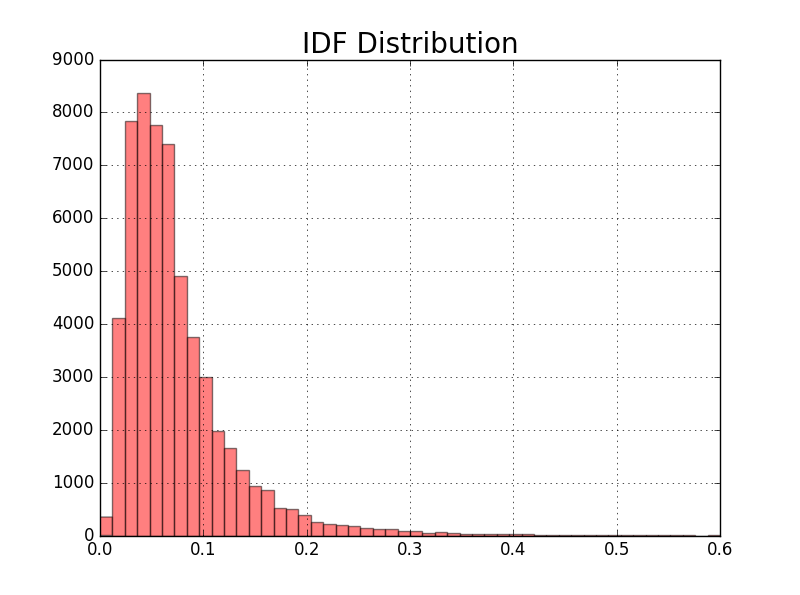

In [49]:
df_classification.idf.hist(bins = 50,alpha = 0.5,range = [0,0.6],color = 'red')
plt.title('IDF Distribution',fontsize = 20)
plt.show()
Image('figure_4.png')

In [50]:
df_classification.idf.mean()

0.074068487343168815

In [57]:
classification = df_classification.loc[df_classification['idf']>0.074]
classification = classification.loc[df_classification['idf']<0.3]
useful_feature = classification.index.tolist()
desc_matrix_less_features = desc_matrix.ix[:,useful_feature]

In [52]:
classification

,feature,idf,Feature_NO,tag
23121,have requested,0.398416,23121,VBN
15875,elemental,0.397919,15875,JJ
48616,the unlimited,0.397598,48616,VBD
24171,honor and,0.397265,24171,VBP
15177,driver features,0.396851,15177,NNS
6718,best cargo,0.396827,6718,NN
6722,best chasing,0.396827,6722,NN
26966,jump from,0.395734,26966,NN
22675,gymnastic,0.394863,22675,JJ
5554,away by,0.394687,5554,VBP


In [60]:
desc_matrix_less_features

feature,42595,12687,12696,12700,12697,23235,8620,21902,31089,23705,...,23316,23297,54571,36096,22524,56275,8370,46817,19058,19820
index,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0.000000,0,0,0,0,...,0,0,0,0,0,0.000000,0,0,0,0
1,0,0,0,0,0,0.000000,0,0,0,0,...,0,0,0,0,0,0.000000,0,0,0,0
2,0,0,0,0,0,0.000000,0,0,0,0,...,0,0,0,0,0,0.000000,0,0,0,0
3,0,0,0,0,0,0.000000,0,0,0,0,...,0,0,0,0,0,0.000000,0,0,0,0
4,0,0,0,0,0,0.000000,0,0,0,0,...,0,0,0,0,0,0.000000,0,0,0,0
5,0,0,0,0,0,0.000000,0,0,0,0,...,0,0,0,0,0,0.000000,0,0,0,0
6,0,0,0,0,0,0.000000,0,0,0,0,...,0,0,0,0,0,0.000000,0,0,0,0
7,0,0,0,0,0,0.000000,0,0,0,0,...,0,0,0,0,0,0.000000,0,0,0,0
8,0,0,0,0,0,0.000000,0,0,0,0,...,0,0,0,0,0,0.000000,0,0,0,0


In [54]:
clf = GaussianNB()
#clf.fit(desc_matrix_less_features,description_for_text['subcategory'])

In [58]:
%timeit
scores_gb = cross_val_score(clf,
                            desc_matrix_less_features,description_for_text['subcategory'],c
                            v =10, scoring = 'accuracy')

In [60]:
scores_gb.mean()

0.71821866138887236

In [194]:
scores_gb.mean()

0.75150069140047937

In [56]:
scores_gb.mean()

0.7232661499312053

In [59]:
scores_gb.mean()

0.68911043138857264

In [91]:
clf.predict(X_train_tfidf[4])

array(['Casino'], 
      dtype='|S27')

In [97]:
scores_nb.mean()
## the mean accuracy is just 40%
## to improve the accuracy of the model, combine some subcategories which are similiar to each other
## build other machine learning algorithms to see 

0.72571595418470425

In [ ]:
for name, group in df_groupByCategory['description']:
    print name
    print group

In [ ]:
df